# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width * height или perimeter Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
 [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataSet = pd.read_csv('./Data/SpotifyFeatures.csv')

Первые 5 записей.

In [3]:
dataSet.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Откинем названия и id треков, а так же имена артистов так как они не информативны.

In [4]:
music_df = dataSet.drop(['artist_name', 'track_name', 'track_id'], axis=1)
music_df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Прежде чем переходить к оброботке данных, я решил узнать есть ли в нем отстутствующие данные и если да то заменить их:

In [5]:
music_df.isnull().sum()

genre               0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Если надо в процентах

In [6]:
def analysisMissingValue(df: pd.DataFrame):
    print('{0:18} {1:23} {2:6}'.format('Raw', 'Procent of missing', "Count"))
    print('-' * 50)
    for col in df.columns:
        print('{0:18}'.format(col) + ' ' * 9 + '{0:2.2%}{1:20}'.format(np.mean(df[col].isnull()),
                                                                       np.sum(df[col].isnull())))


In [7]:
analysisMissingValue(music_df)

Raw                Procent of missing      Count 
--------------------------------------------------
genre                      0.00%                   0
popularity                 0.00%                   0
acousticness               0.00%                   0
danceability               0.00%                   0
duration_ms                0.00%                   0
energy                     0.00%                   0
instrumentalness           0.00%                   0
key                        0.00%                   0
liveness                   0.00%                   0
loudness                   0.00%                   0
mode                       0.00%                   0
speechiness                0.00%                   0
tempo                      0.00%                   0
time_signature             0.00%                   0
valence                    0.00%                   0


Все данные на месте, можно работать.

Посмотрим на популярность жанров.

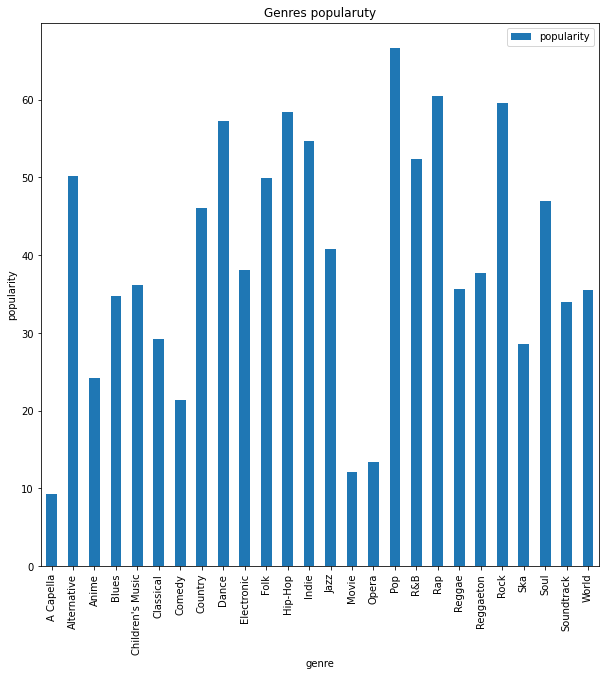

In [27]:
music_df[['genre', 'popularity']].groupby('genre').mean().plot(figsize=(10, 10), kind='bar')
plt.title('Genres popularuty')
plt.ylabel('popularity')
plt.show()

Исходя из этого графика можем судить о популярности жанров: самый популярный поп, на втором месте - реп ... наименее популярный - детская музыка.
А еще можно заметить что у нас есть 2 жанра "Children's Music" и "Children’s Music". Они конечно же вкорне отличиются друг от друга, поэтому сольем ка мы их в 1 жанр и заново построим рэйтинг популярности.

In [26]:
music_df = music_df.replace('Children’s Music', 'Children\'s Music')

Посмотрим сколько инструментов обычно используют.

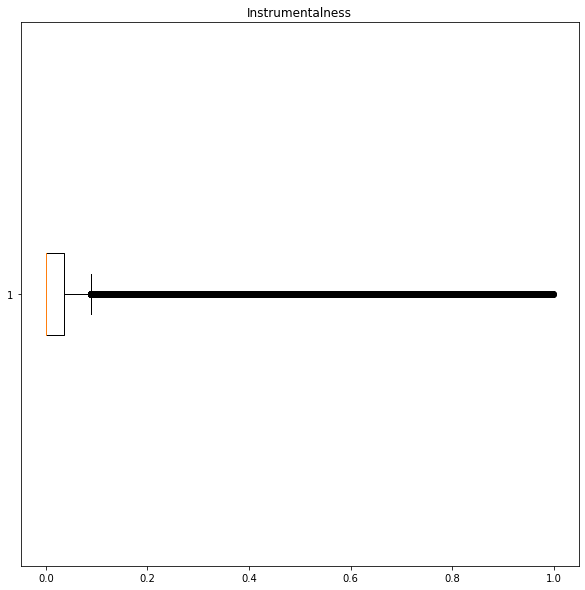

In [10]:
plt.figure(figsize=(10, 10))
plt.boxplot(music_df.instrumentalness, vert=False)
plt.title('Instrumentalness')
plt.show()

В основном музыка малоинструментальна.
Неудивительно ведь сейчас для написания музыки в основном используют специальный софт (вроде FL Studio).

Посмотрим есть ли зависимость между энергичностью и громкостью музыки

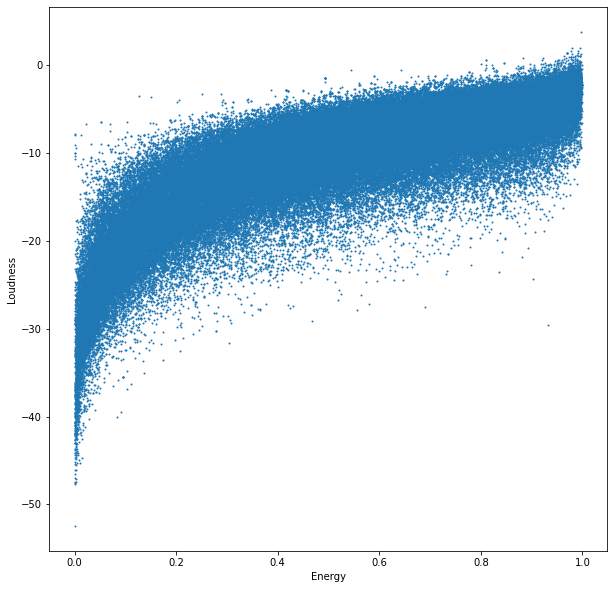

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(music_df.energy,
            music_df.loudness,
            s=1
            )
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

Посмотрим на гистограмме

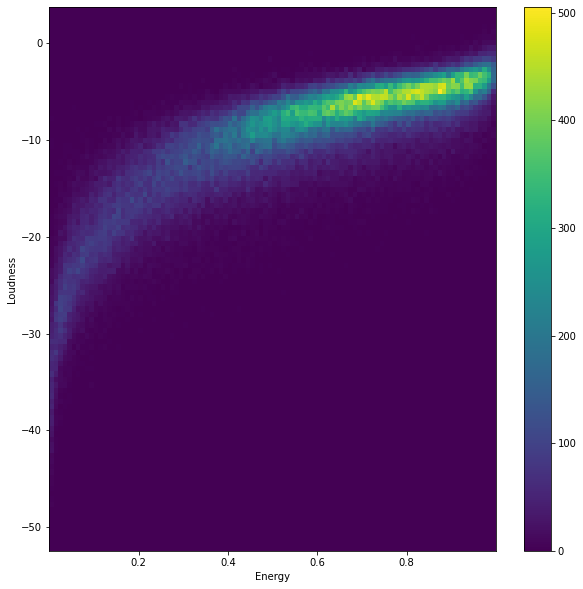

In [12]:
plt.figure(figsize=(10, 10))
x = music_df.energy
y = music_df.loudness
_, _, _, image = plt.hist2d(x, y, bins=100)
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.colorbar(image)
plt.show()

Можем сделать вывод что малоэнергичная музыка обычно тихая, дальше с ростом энергичности громкость растет не сильно.
А так же основываясь на гистограмме можем сказать что в основном музыка энергичная.

Посмотрим на продолжительность музыки.

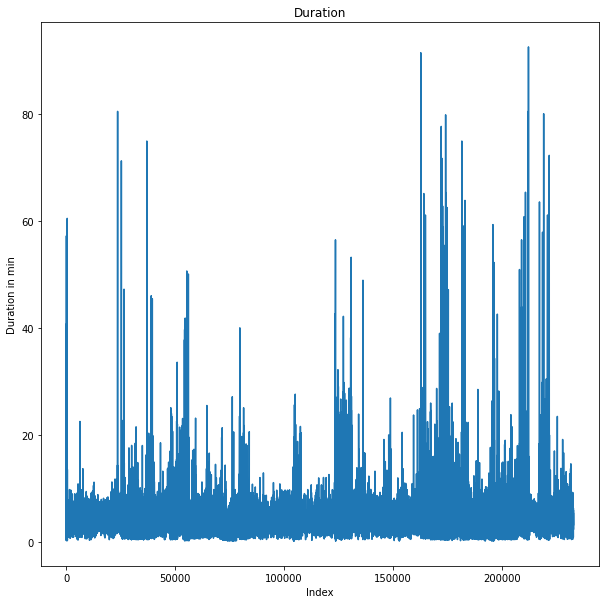

In [13]:
def to_minutes(x):
    return x / 1000 / 60

dur = music_df.duration_ms.pipe(to_minutes)
plt.figure(figsize=(10, 10))
plt.plot(dur)
plt.title("Duration")
plt.ylabel("Duration in min")
plt.xlabel("Index")
plt.show()

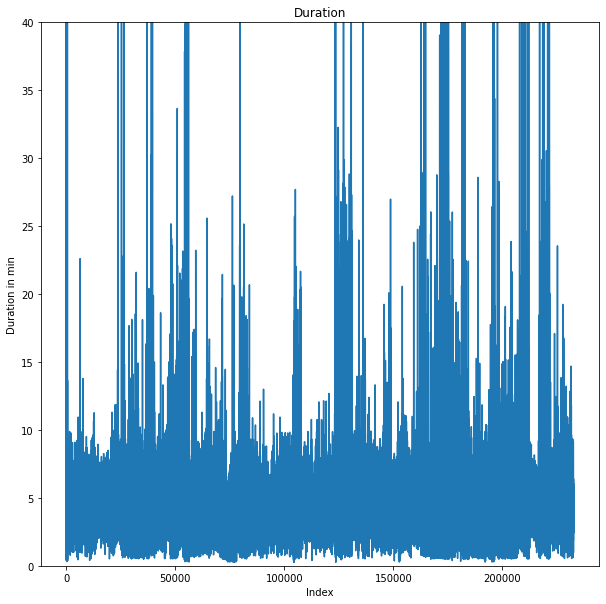

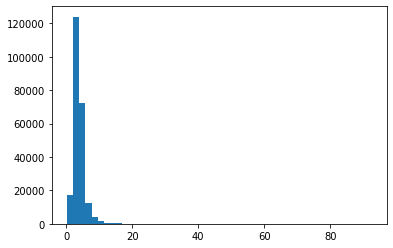

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(dur)
plt.ylim(0, 40)
plt.title("Duration")
plt.ylabel("Duration in min")
plt.xlabel("Index")
plt.show()
plt.hist(dur, bins=50)
plt.show()

Отсюда видим что в основном наши трэки дляться примерно от 2 до 10 минут

Ну и наконец сохраним наш датафрэйм

In [15]:
music_df.to_csv('./Data/SpotifyDataFrame.csv')

К сожалению не придумал ничего лучше, чем создать колонку с продолжительностью в минутах.

In [16]:
music_df.duration_min = music_df.duration_ms.pipe(to_minutes)
music_df.head()

C:\Users\Gleb\AppData\Local\Temp/ipykernel_16856/176684904.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  music_df.duration_min = music_df.duration_ms.pipe(to_minutes)


,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [17]:
from scipy.interpolate import interp1d

k = 20
x = np.arange(k)
y = np.random.random(k)

step = 0.1
new_x = np.arange(0, k - (1 - step), step)
scipy_linear_func = interp1d(x, y, kind="linear")
scipy_quadratic_func = interp1d(x, y, kind="quadratic")

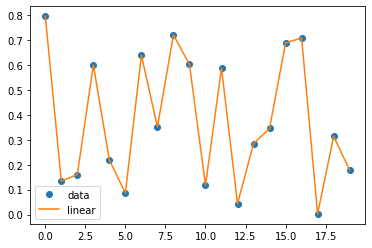

In [18]:
# linear
plt.plot(x, y, 'o', new_x, scipy_linear_func(new_x), '-')
plt.legend(['data', 'linear'], loc='best')
plt.show()

Имплементация линейной интерполяции в библиотеке `scipy` находятся [здесь](https://github.com/scipy/scipy/blob/a6124626bb99d73aa7f99bf8e3da7d9e2c670aa8/scipy/interpolate/interpolate.py#L199).

Линейная интерполяция представляет из-за просто соединение двух входных точек прямой y = kx + b.
Для этого используем формулу построения прямой по двум точкам.

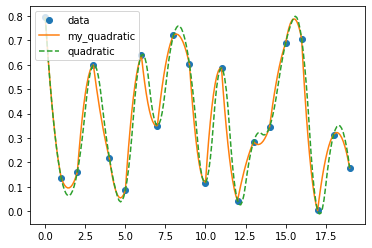

In [19]:
# F(x) = a0 + (a1 * x) + (a2 * x^2)
def help_func(x0, x1, x2, y0, y1, y2):
    a2 = (y2 - y0) / ((x2 - x0) * (x2 - x1)) - (y1 - y0) / ((x1 - x0) * (x2 - x1))
    a1 = (y1 - y0) / (x1 - x0) - a2 * (x1 + x0)
    a0 = y0 - a1 * x0 - a2 * x0 ** 2
    return a0, a1, a2

def my_quadratic_interp1d(x, y, x_arr):
    quadratic_func = []
    for i in range(1, len(x) - 1):
        quadratic_func.append(help_func(x[i - 1], x[i], x[i + 1],
                                        y[i - 1], y[i], y[i + 1]))

    new_y = []
    for in_x in x_arr:
        board = math.floor(in_x)
        if board >= len(quadratic_func):
            board = len(quadratic_func) - 1
        tuple = quadratic_func[board]
        new_y.append(tuple[0] +
                     (tuple[1] * in_x) +
                     (tuple[2] * in_x ** 2))
    return new_y


plt.plot(x, y, 'o',
         new_x, my_quadratic_interp1d(x, y, new_x), '-',
         new_x, scipy_quadratic_func(new_x), '--')
plt.legend(['data', 'my_quadratic', 'quadratic'], loc='best')
plt.show()

Имплементация `quadratic` интерполяции в библиотеке `scipy` находятся [здесь][scipy_quadratic_ref_1].

Если быть более точным, то [здесь][scipy_quadratic_ref_2].

Если быть еще более точнее, то [здесь][scipy_quadratic_ref_3].

Матрица для квадратной [тут][scipy_quadratic_ref_4].

В общем [там][scipy_quadratic_ref_5] какие то производные точки слева и справа, производные значения, как то красиво соединяются параболы, все как то сглаживается.
Очень сложно, если честно я не понял, но в задании вроде и не надо полностью разобраться как работает метод в `scipy`.

[//]: <> (All links)
[scipy_quadratic_ref_1]: https://github.com/scipy/scipy/blob/a6124626bb99d73aa7f99bf8e3da7d9e2c670aa8/scipy/interpolate/interpolate.py#L441
[scipy_quadratic_ref_2]: https://github.com/scipy/scipy/blob/a6124626bb99d73aa7f99bf8e3da7d9e2c670aa8/scipy/interpolate/interpolate.py#L542
[scipy_quadratic_ref_3]: https://github.com/scipy/scipy/blob/a6124626bb99d73aa7f99bf8e3da7d9e2c670aa8/scipy/interpolate/_bsplines.py#L1090
[scipy_quadratic_ref_4]: https://github.com/scipy/scipy/blob/a6124626bb99d73aa7f99bf8e3da7d9e2c670aa8/scipy/interpolate/_bsplines.py#L1278
[scipy_quadratic_ref_5]: https://github.com/scipy/scipy/blob/a6124626bb99d73aa7f99bf8e3da7d9e2c670aa8/scipy/interpolate/_bsplines.py#L1309

Видимо в бублиотеке `scipy` оно считается немного сложнее, чем просто парабола по 3 точкам, как мы можем видеть из графика оно плавно соединяет параболы, а следовательно в построении графика учавствуют не только 3 точки по которым строиться парабола как делал я (поэтому у меня они так криво между собой соединяются).

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


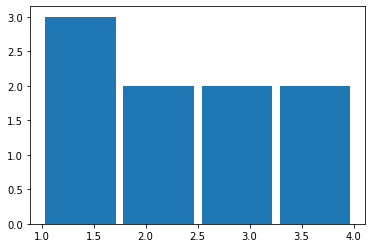

In [20]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1, 1, 2, 3, 4, 1, 2, 3, 4]

value_counts_my, bins_names, visual_figure = plt.hist(array,
                                                      bins=len(set(array)),
                                                      rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts_my)
print('Названия колонок:', bins_names)

In [21]:
from typing import List, Tuple, Union
from collections import Counter


def fast_hist(array: List[Union[int, float]],
              bins_count: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins_count:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """

    dict_unique = Counter(array)
    unique = sorted(dict_unique)
    min_elem = min(array)
    max_elem = max(array)

    step = (max_elem - min_elem) / bins_count
    upper = min_elem + step * bins_count + step * 0.9
    bins = np.arange(min_elem, upper, step)

    # я нашел функцию для этого в нумпае, но думаю что не стоит ее использовать (к тому же я не знаю как именно она работает)
    # bins = np.histogram_bin_edges(array, bins_count, (min_elem, max_elem))
    value_counts = [0] * (len(bins) -1)
    index_unique = 0
    index_labels = 0
    while True:
        if index_labels >= len(bins):
            break
        if index_unique >= len(unique):
            break

        if (bins[index_labels] <= unique[index_unique]) and (index_labels + 1 >= len(bins) or (unique[index_unique] < bins[index_labels + 1])):
            value_counts[(index_labels if index_labels < (len(bins) - 1) else (index_labels - 1))] += dict_unique[unique[index_unique]]
            index_unique += 1
        else:
            index_labels += 1

    return value_counts, bins


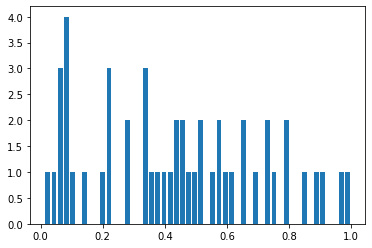

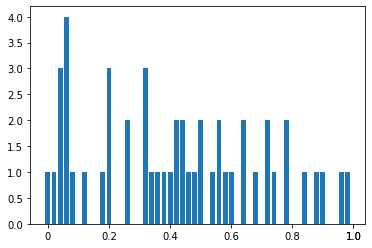

Значения колонок-станд: [1. 1. 3. 4. 1. 0. 1. 0. 0. 1. 3. 0. 0. 2. 0. 0. 3. 1. 1. 1. 1. 2. 2. 1.
 1. 2. 0. 1. 2. 1. 1. 0. 2. 0. 1. 0. 2. 1. 0. 2. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 1.]
Значения колонок-мои: [1, 1, 3, 4, 1, 0, 1, 0, 0, 1, 3, 0, 0, 2, 0, 0, 3, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
Названия колонок-станд: [0.01353629 0.03321043 0.05288456 0.0725587  0.09223283 0.11190697
 0.13158111 0.15125524 0.17092938 0.19060351 0.21027765 0.22995178
 0.24962592 0.26930005 0.28897419 0.30864832 0.32832246 0.34799659
 0.36767073 0.38734486 0.407019   0.42669313 0.44636727 0.4660414
 0.48571554 0.50538968 0.52506381 0.54473795 0.56441208 0.58408622
 0.60376035 0.62343449 0.64310862 0.66278276 0.68245689 0.70213103
 0.72180516 0.7414793  0.76115343 0.78082757 0.8005017  0.82017584
 0.83984997 0.85952411 0.87919825 0.89887238 0.91854652 0.93822065
 0.95789479 0.97756892 0.99724306]
Названия колонок-мои: [0.01353629 0.03321043 0.05288456

In [28]:
array = np.random.random(50)
value_counts_std, bins_names_std, _ = plt.hist(array,
                                               bins=len(array),
                                               rwidth=0.8)

plt.show()
value_counts_my, bins_names = fast_hist(array, len(array))

# Если выводить все bins_names выгляди ужасно(оно все склеивается)
# Функция только для красоты, не является частью задания
def generate_labels(bins_names):
    bins_max_ind = len(bins_names) - 1
    labels_pos = []
    labels = []
    labels_pos.append(0.)
    labels.append(0)
    for i in range(1, 6):
        labels_pos.append(round(bins_max_ind / 5 * i))
        labels.append(round(bins_names[labels_pos[i]], 1))

    labels_pos.append(bins_max_ind)
    labels.append(round(bins_names[bins_max_ind], 1))
    return labels_pos, labels

labels_pos, labels = generate_labels(bins_names)
x_pos = np.arange(len(value_counts_my))
plt.bar(x_pos, value_counts_my)
plt.xticks(labels_pos, labels)
plt.show()
print('Значения колонок-станд:', value_counts_std)
print('Значения колонок-мои:', value_counts_my)
print('Названия колонок-станд:', bins_names_std)
print('Названия колонок-мои:', bins_names)


# Сравнение скорости:

35.3 ms ± 8.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


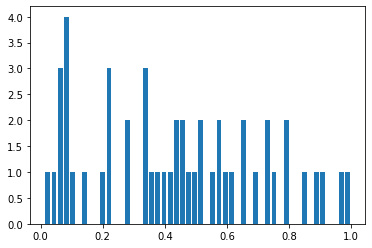

In [29]:
%timeit plt.hist(array, bins=len(set(array)), rwidth=0.8)

In [24]:
%timeit fast_hist(array, len(set(array)))

22 µs ± 2.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Cамо распределение получаем в разы быстрее(раз так в 200) потому что не формируем гистограмму, давайте посмотрим за сколько мы построим гистограмму.

34.2 ms ± 3.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


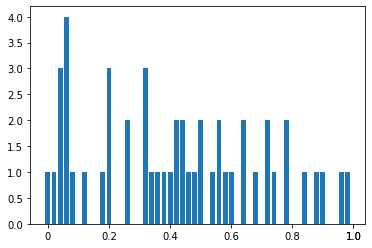

In [30]:
def temp(array, bins):
    value_counts, bins_names_= fast_hist(array, bins)
    labels_pos, labels = generate_labels(bins_names)
    plt.bar(np.arange(len(value_counts)), value_counts)
    plt.xticks(labels_pos, labels)
%timeit temp(array, len(set(array)))

В общем случае примерно так же.